## Importing Libraries

In [ ]:
import pandas as pd   # pandas is used for importing and managing datasets
from nltk.tokenize import word_tokenize  # for tokenization
from nltk.corpus import stopwords  # for removing stopwords
from nltk.stem.porter import *  # for removing the commoner morphological and inflexional endings from words in English
import string  # to play with strings
import nltk  # provides us various text processing libraries with a lot of test datasets
from sklearn.feature_extraction.text import CountVectorizer  # Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.metrics import confusion_matrix  # for making confusion matrix
import seaborn as sns  # to visualize random distributions
!pip install textstat  #  to calculate statistics from text to determine readability, complexity and grade level of a particular corpus
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  # for splitting dataset into training and testing data
from sklearn.metrics import f1_score  # calculates the F1 score for a set of predicted labels
from sklearn.feature_selection import SelectFromModel  # Meta-transformer for selecting features based on importance weights
from sklearn.metrics import classification_report  # Build a text report showing the main classification metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np  # for mathematical operations
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS  # measures the attitude, sentiments, evaluations, and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.
import warnings  # so that the program doesn't stop whenever an exception occurs
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline  
# for data visualization, is a plotting library and pyplot is a sub library for plotting charts
import io  # This module helps us to solve file related input and output operations
from google.colab import files  # for importing files from device to google colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 5.4 MB/s 
     |████████████████████████████████| 2.0 MB 38.8 MB/s 


## Uploading csv file from the device

Link for dataset:
[https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset](https://)

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anjaliyadav23","key":"f5ab288d5c9158eb4870d43149717d3d"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d mrmorj/hate-speech-and-offensive-language-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 66.4MB/s]


In [ ]:
! unzip hate-speech-and-offensive-language-dataset.zip

Archive:  hate-speech-and-offensive-language-dataset.zip
  inflating: labeled_data.csv        


In [ ]:
df=pd.read_csv('labeled_data.csv',encoding = 'utf-8')

### Adding text-length as a field in the dataset

In [ ]:
df['text length'] = df['tweet'].apply(len)
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,text length
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


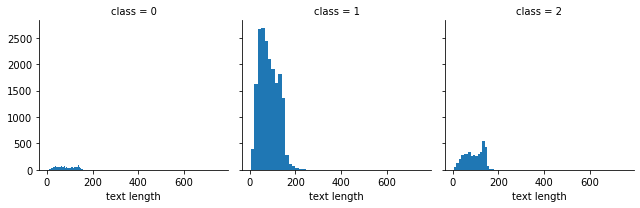

In [ ]:
import matplotlib.pyplot as plt

'''FacetGrid class helps in visualizing distribution of one variable as well as the 
relationship between multiple variables separately within subsets of your dataset using multiple panels.'''

g=sns.FacetGrid(data=df, col='class')
g.map(plt.hist, 'text length', bins=50)

# mapping of facetgrid can be done by the use of any graph
# the only change is in the parameters

a. Distribution of text-length almost seem to be similar across all three classes

b. Number of tweets seem to be skewed a lot higher towards the class-1

### Box-plot visvualization

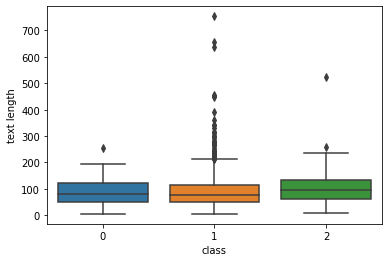

In [ ]:
sns.boxplot(x='class', y='text length', data=df)

From the box-plot, looks like the class-1 tweets have much longer text. There are also outliers present so text-length won’t be a useful feature to consider.

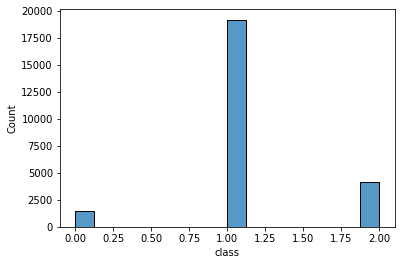

In [ ]:
sns.histplot(data=df,x=df['class'])

The above histogram shows that most of the tweets are considered to be offensive words

In [ ]:
# collecting only the tweets from the csv file into a variable name tweet
tweet=df.tweet
tweet

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

## Preprocessing of the tweets

What we will do in this section is:

 1. Removal of punctuation and capitlization
 2. Tokenizing
 3. Removal of stopwords
 4. Stemming

In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# RegEx can be used to check if a string contains the specified search pattern.

import regex as re

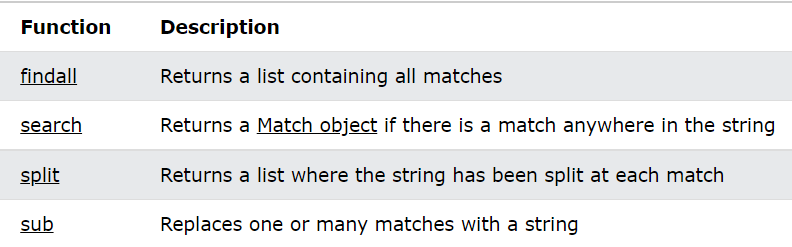

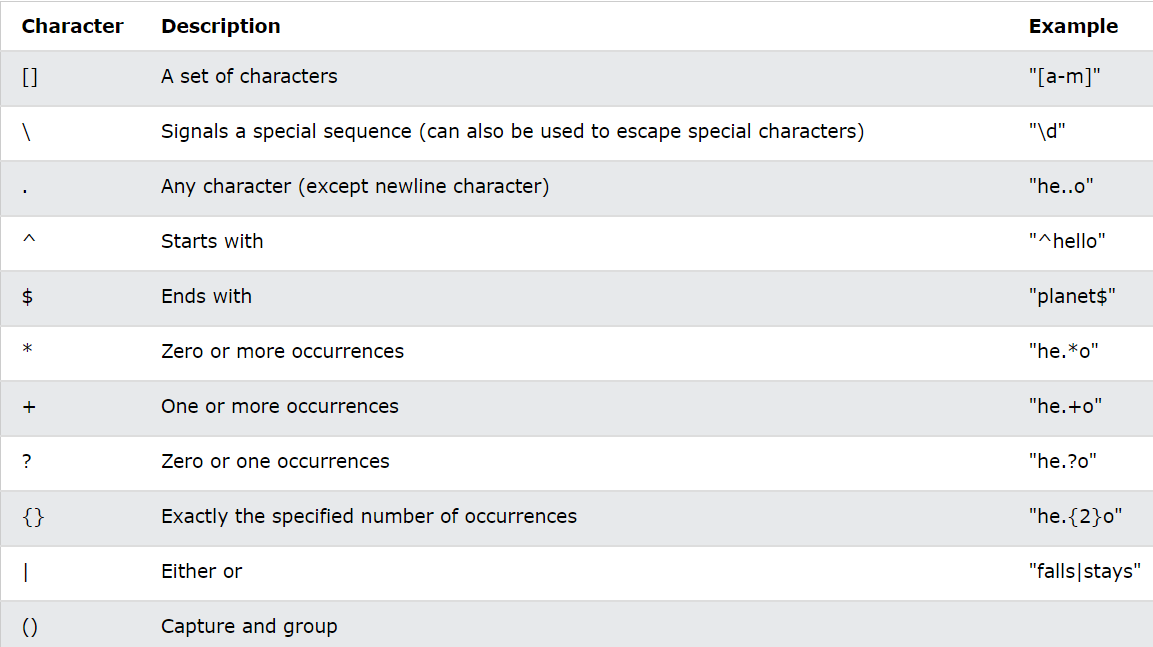

\d  
Matches any decimal digit; this is equivalent to the class [0-9].

\D  
Matches any non-digit character; this is equivalent to the class [^0-9].

\s  
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].

\S  
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].

\w  
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].

\W  
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_]

Tasks to perform:

1. removal of extra spaces
2. removal of @name[mention]
3. removal of links[https://abc.com]
4. removal of punctuations and numbers
5. remove whitespace with a single space
6. remove leading and trailing whitespace
7. replace normal numbers with numbr
8. removal of capitalization

In [ ]:
def clean (text):
  text = str (text). lower()
  text = re. sub('[.?]', '', text)
  text = re. sub('https?://\S+|www.\S+', '', text)
  text = re. sub('<.?>+', '', text)
  text = re. sub('[%s]' % re. escape(string. punctuation), '', text)
  text = re. sub('\n', '', text)
  text = re. sub('\w\d\w', '', text)
  text = [word for word in text.split(' ') if word not in stopwords]
  text=' '. join(text)
  text = [stemmer. stem(word) for word in text. split(' ')]
  text=' '. join(text)
  return text
processed_tweets = df['tweet']. apply(clean)

In [ ]:
processed_tweets

0         mayasolov woman shouldnt complain clean hous ...
1         mlee boy dat coldtyga dwn bad cuffin dat hoe ...
2         urkindofbrand dawg babif ever fuck bitch star...
3                      cganderson vivabas look like tranni
4         shenikarobert shit hear might true might fake...
                               ...                        
24778    you muthafin lie 0lifeask earl coreyemanuel ri...
24779    youv gone broke wrong heart babi drove redneck...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffl  ntac eileen dahlia  beauti color combin...
Name: tweet, Length: 24783, dtype: object

In [ ]:
df['processed_tweets'] = processed_tweets
df[["tweet","processed_tweets"]].head(10)

,tweet,processed_tweets
0,!!! RT @mayasolovely: As a woman you shouldn't...,mayasolov woman shouldnt complain clean hous ...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,mlee boy dat coldtyga dwn bad cuffin dat hoe ...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,urkindofbrand dawg babif ever fuck bitch star...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,cganderson vivabas look like tranni
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shenikarobert shit hear might true might fake...
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",tmadisonx shit blow meclaim faith somebodi sti...
6,"!!!!!!""@__BrighterDays: I can not just sit up ...",brighterday sit hate anoth bitch got much shi...
7,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,0selfiequeenbri caus im tire big bitch come us...
8,""" &amp; you might not get ya bitch back &amp; ...",amp might get ya bitch back amp that
9,""" @rhythmixx_ :hobbies include: fighting Maria...",rhythmixx hobbi includ fight mariambitch


## Visualization

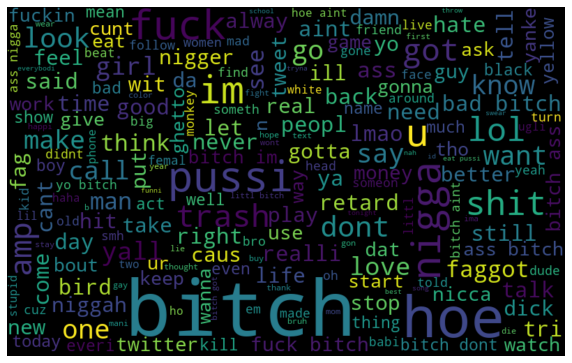

In [ ]:
# visualizing which of the word is most commonly used in the twitter dataset
from wordcloud import WordCloud

# imshow - Display data as an image
# interpolation - https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html

all_words = ' '.join([text for text in df['processed_tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

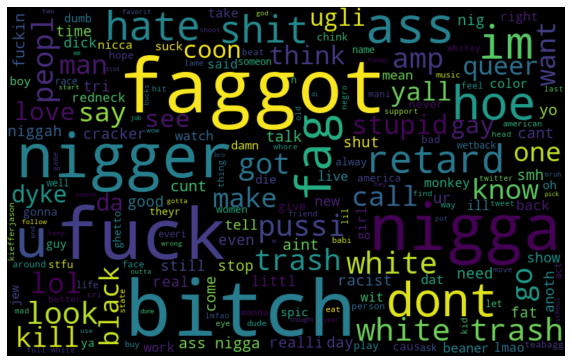

In [ ]:
# visualizing which of the word is most commonly used for hatred speech
hatred_words = ' '.join([text for text in df['processed_tweets'][df['class'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(hatred_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

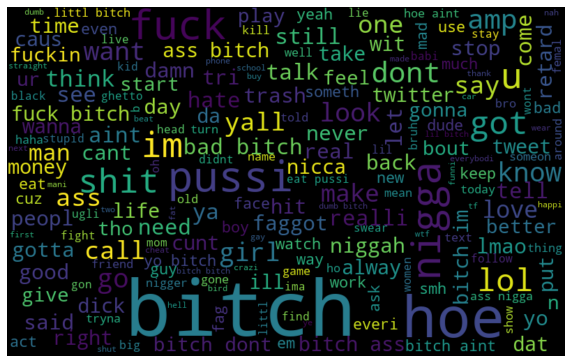

In [ ]:
# visualizing which of the word is most commonly used for offensive speech
offensive_words = ' '.join([text for text in df['processed_tweets'][df['class'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(offensive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

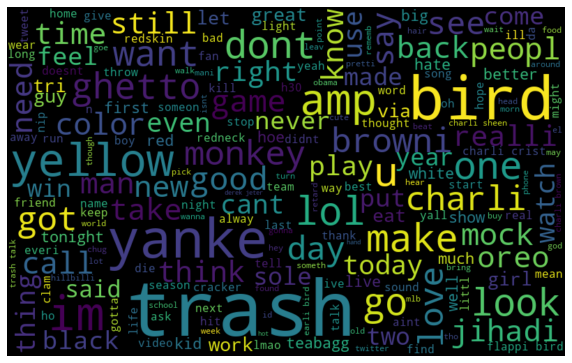

In [ ]:
# visualizing which of the word is most commonly used for non-offensive speech
neither = ' '.join([text for text in df['processed_tweets'][df['class'] == 2]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neither)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#TF-IDF Features-F1
from IPython.display import IFrame
documentation = IFrame(src='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html', width=1000, height=450)
display(documentation)

In [ ]:
dt_trasformed = df[['class', 'tweet']]
y = dt_trasformed.iloc[:, :-1].values

In [ ]:
y

array([[2],
       [1],
       [1],
       ...,
       [1],
       [1],
       [2]])

### Encoding the Dependent Variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y))

In [ ]:
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y_offensive = np.array(y_df[1])

CountVectorizer means breaking down a sentence or any text into words by performing preprocessing tasks like converting all words to lowercase, thus removing special characters. In NLP models can't understand textual data they only accept numbers, so this textual data needs to be vectorized.

In [ ]:
cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(processed_tweets).toarray()

### Splitting the dataset into the Training set and Test set

In [ ]:
y_hate

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hate, test_size = 0.20, random_state = 0)

# Comparing models to identify the best one

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## Naive Bayes

In [ ]:
classifier_np = GaussianNB()
classifier_np.fit(X_train, y_train)

GaussianNB()

### Confusion Matrix

In [ ]:
y_pred_np = classifier_np.predict(X_test)
cm = confusion_matrix(y_test, y_pred_np)
print(cm)

[[1957 2721]
 [  89  190]]


In [ ]:
np_score = accuracy_score(y_test, y_pred_np)

## Decision Trees

In [ ]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Confusion Matrix

In [ ]:
y_pred_dt = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

[[4475  203]
 [ 185   94]]


In [ ]:
dt_score = accuracy_score(y_test, y_pred_dt)

## KNN

In [ ]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

### Confusion Matrix

In [ ]:
y_pred_knn = classifier_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[4587   91]
 [ 212   67]]


In [ ]:
knn_score = accuracy_score(y_test, y_pred_knn)

## Logistic Regression

In [ ]:
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Confusion Matrix

In [ ]:
y_pred_lr = classifier_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[4617   61]
 [ 227   52]]


In [ ]:
lr_score = accuracy_score(y_test, y_pred_lr)

## Random Forest

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Confusion Matrix

In [ ]:
y_pred_rf = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

[[4587   91]
 [ 216   63]]


In [ ]:
rf_score = accuracy_score(y_test, y_pred_rf)

##Comparing Accuracy Scores

In [ ]:
print('Random Forest Accuracy: ', str(rf_score))
print('Linear Regression Accuracy: ', str(lr_score))
print('KNN Accuracy: ', str(knn_score))
print('Decision Tree Accuracy: ', str(dt_score))
print('Naive Bayes Accuracy: ', str(np_score))

Random Forest Accuracy:  0.9380673794633851
Linear Regression Accuracy:  0.9419003429493645
KNN Accuracy:  0.9388743191446439
Decision Tree Accuracy:  0.9217268509178939
Naive Bayes Accuracy:  0.4331248739156748


We can see from the above results that Linear Regression Accuracy will give the best prediction.

Note that Random Forest, KNN and Decision Tree algorithms also work well in this dataset.

In [ ]:
prediction = classifier_lr.predict(X_test)

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      4678
         1.0       0.46      0.19      0.27       279

    accuracy                           0.94      4957
   macro avg       0.71      0.59      0.62      4957
weighted avg       0.93      0.94      0.93      4957



In [ ]:
test='I hate this man'

In [ ]:
data = cv.transform([test]).toarray()

In [ ]:
print(classifier_lr.predict(data))

[0.]
